In [1]:
#Loading and Inspecting the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)

In [2]:
#Loading and Inspecting the Dataset

file_path = 'auto_imports.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
data.tail()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            200 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          200 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         200 non-null    object 
 19  2.68    

In [6]:
data.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27,13495
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
data.sum().isnull()

3              False
?              False
alfa-romero    False
gas            False
std            False
two            False
convertible    False
rwd            False
front          False
88.60          False
168.80         False
64.10          False
48.80          False
2548           False
dohc           False
four           False
130            False
mpfi           False
3.47           False
2.68           False
9.00           False
111            False
5000           False
21             False
27             False
13495          False
dtype: bool

In [8]:
# Assign proper column names
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
           'city_mpg', 'highway_mpg', 'price']
data.columns = columns

In [9]:
# Convert columns to numeric types and handle non-numeric data
data['normalized_losses'] = pd.to_numeric(data['normalized_losses'], errors='coerce')
data['bore'] = pd.to_numeric(data['bore'], errors='coerce')
data['stroke'] = pd.to_numeric(data['stroke'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['peak_rpm'] = pd.to_numeric(data['peak_rpm'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [10]:
# Handle missing values by imputing with the median for numerical columns
data['normalized_losses'].fillna(data['normalized_losses'].median(), inplace=True)
data['bore'].fillna(data['bore'].median(), inplace=True)
data['stroke'].fillna(data['stroke'].median(), inplace=True)
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)
data['peak_rpm'].fillna(data['peak_rpm'].median(), inplace=True)

In [11]:
# Use one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the encoded data
data_encoded.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_four,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,2,115.0,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [12]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [13]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [14]:
# Generate correlation matrix only for numerical columns
corr_matrix = data_encoded.corr()

In [15]:
for column in data:
    print(column)

symboling
normalized_losses
make
fuel_type
aspiration
num_of_doors
body_style
drive_wheels
engine_location
wheel_base
length
width
height
curb_weight
engine_type
num_of_cylinders
engine_size
fuel_system
bore
stroke
compression_ratio
horsepower
peak_rpm
city_mpg
highway_mpg
price


In [16]:
# Processed Data
print("\nProcessed Data:")
data.head()


Processed Data:


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,2,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250


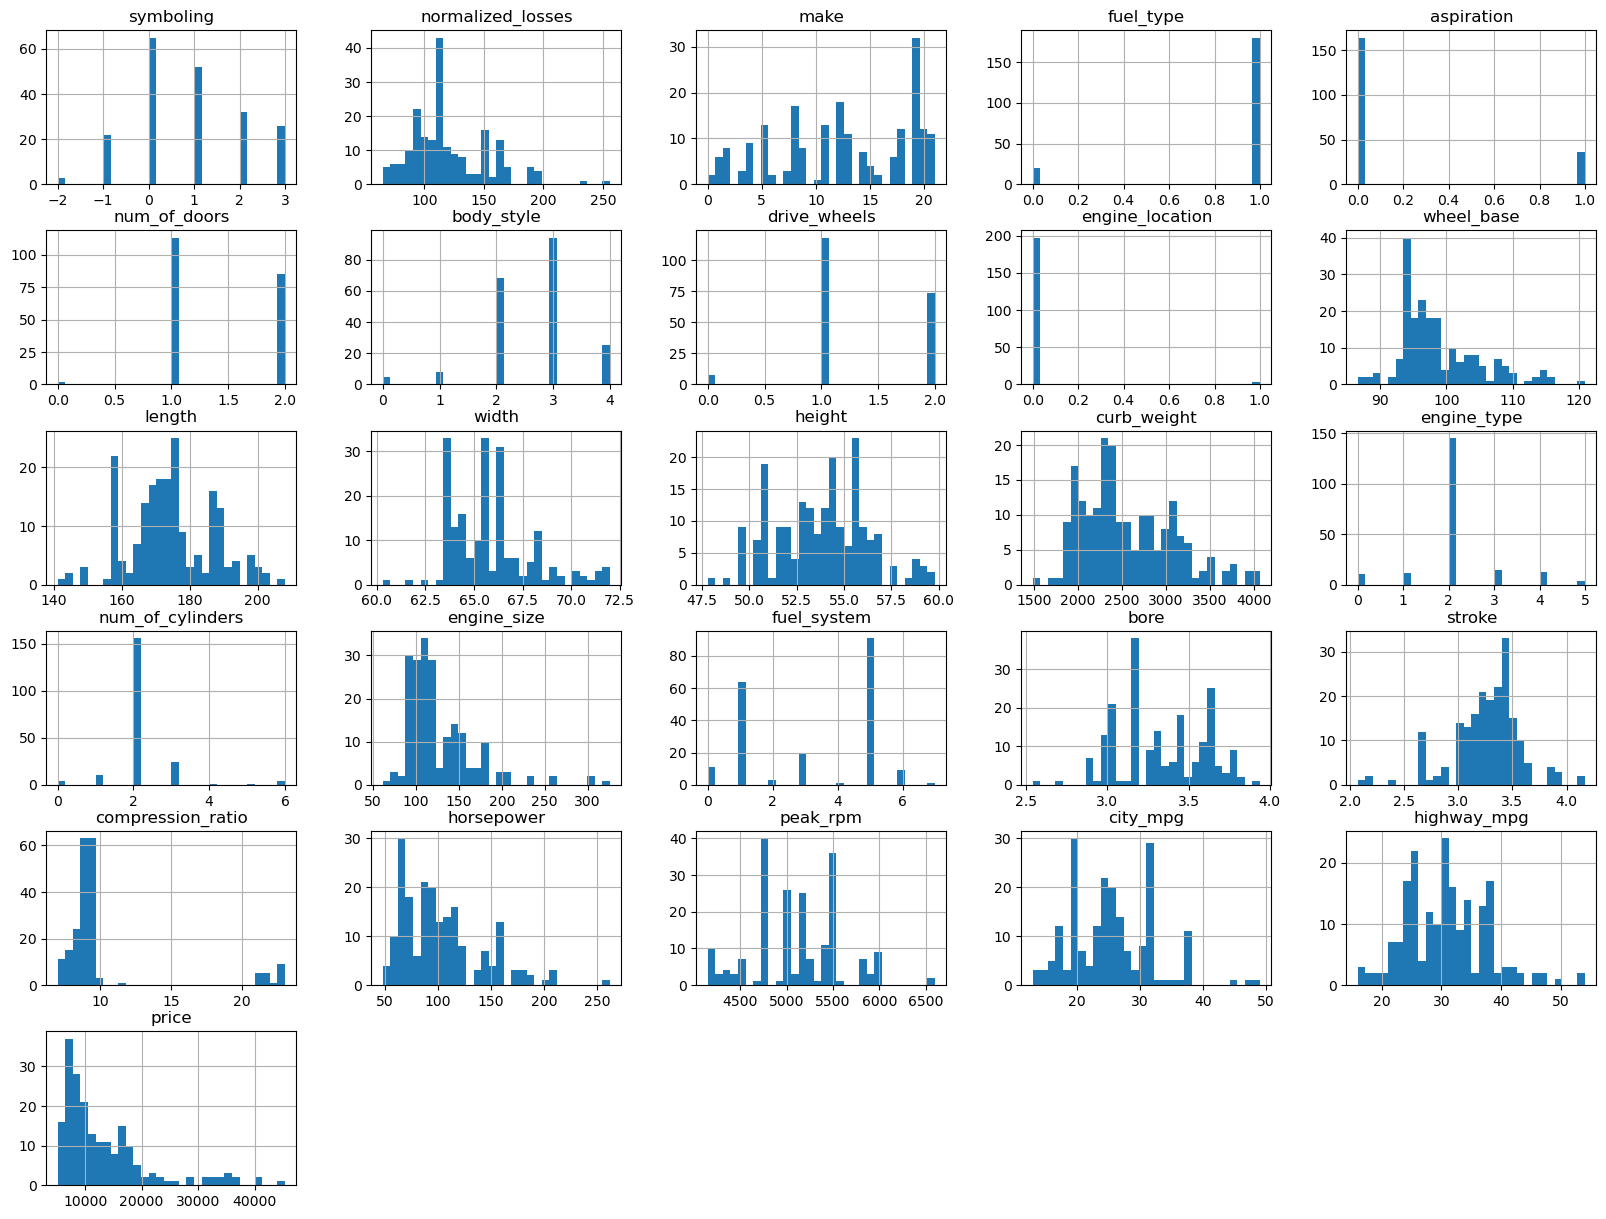

In [17]:
# Univariate Analysis
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()

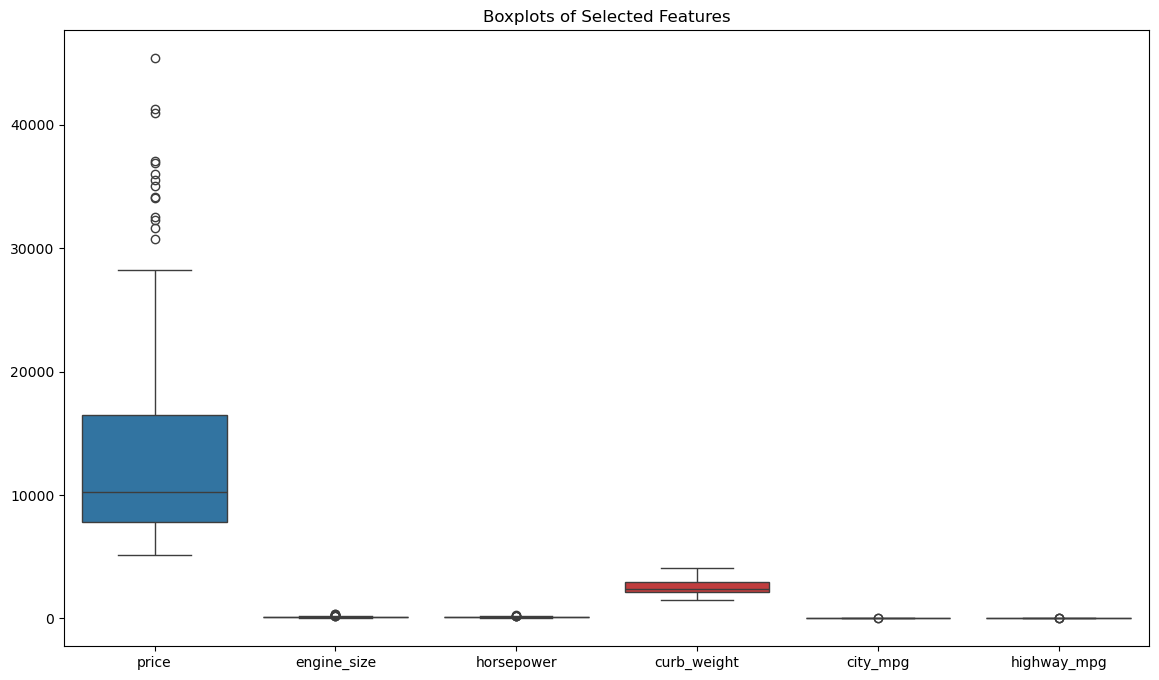

In [18]:
# Boxplots for Numeric Columns
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['price', 'engine_size', 'horsepower', 'curb_weight', 'city_mpg', 'highway_mpg']])
plt.title("Boxplots of Selected Features")
plt.show()

In [19]:
# Insights:-

# 1.Price:
# Variation: A wide range in car prices indicates a diverse set of vehicles, from budget to luxury models.
# Outliers: High-priced outliers suggest the presence of luxury or specialty vehicles.

# 2.Engine Size:
# Typical Sizes: The central box indicates the common engine sizes, with possible outliers representing either very small,
# fuel-efficient engines or large, performance-oriented engines.

# 3.Horsepower:
# Performance Levels: The spread in horsepower reflects a mix of vehicle types, from low-power economy cars to high-power 
# sports cars.
# Outliers: High horsepower outliers indicate performance vehicles.

# 4.Curb Weight:
# Weight Range: The distribution of curb weights shows the mix of light to heavy vehicles, with outliers 
# potentially indicating very large trucks or lightweight compacts.

# 5.City MPG and Highway MPG:
# Efficiency Insights: The boxplots for city and highway MPG highlight typical fuel efficiency levels, with higher outliers
# likely representing hybrid or electric vehicles.

In [20]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


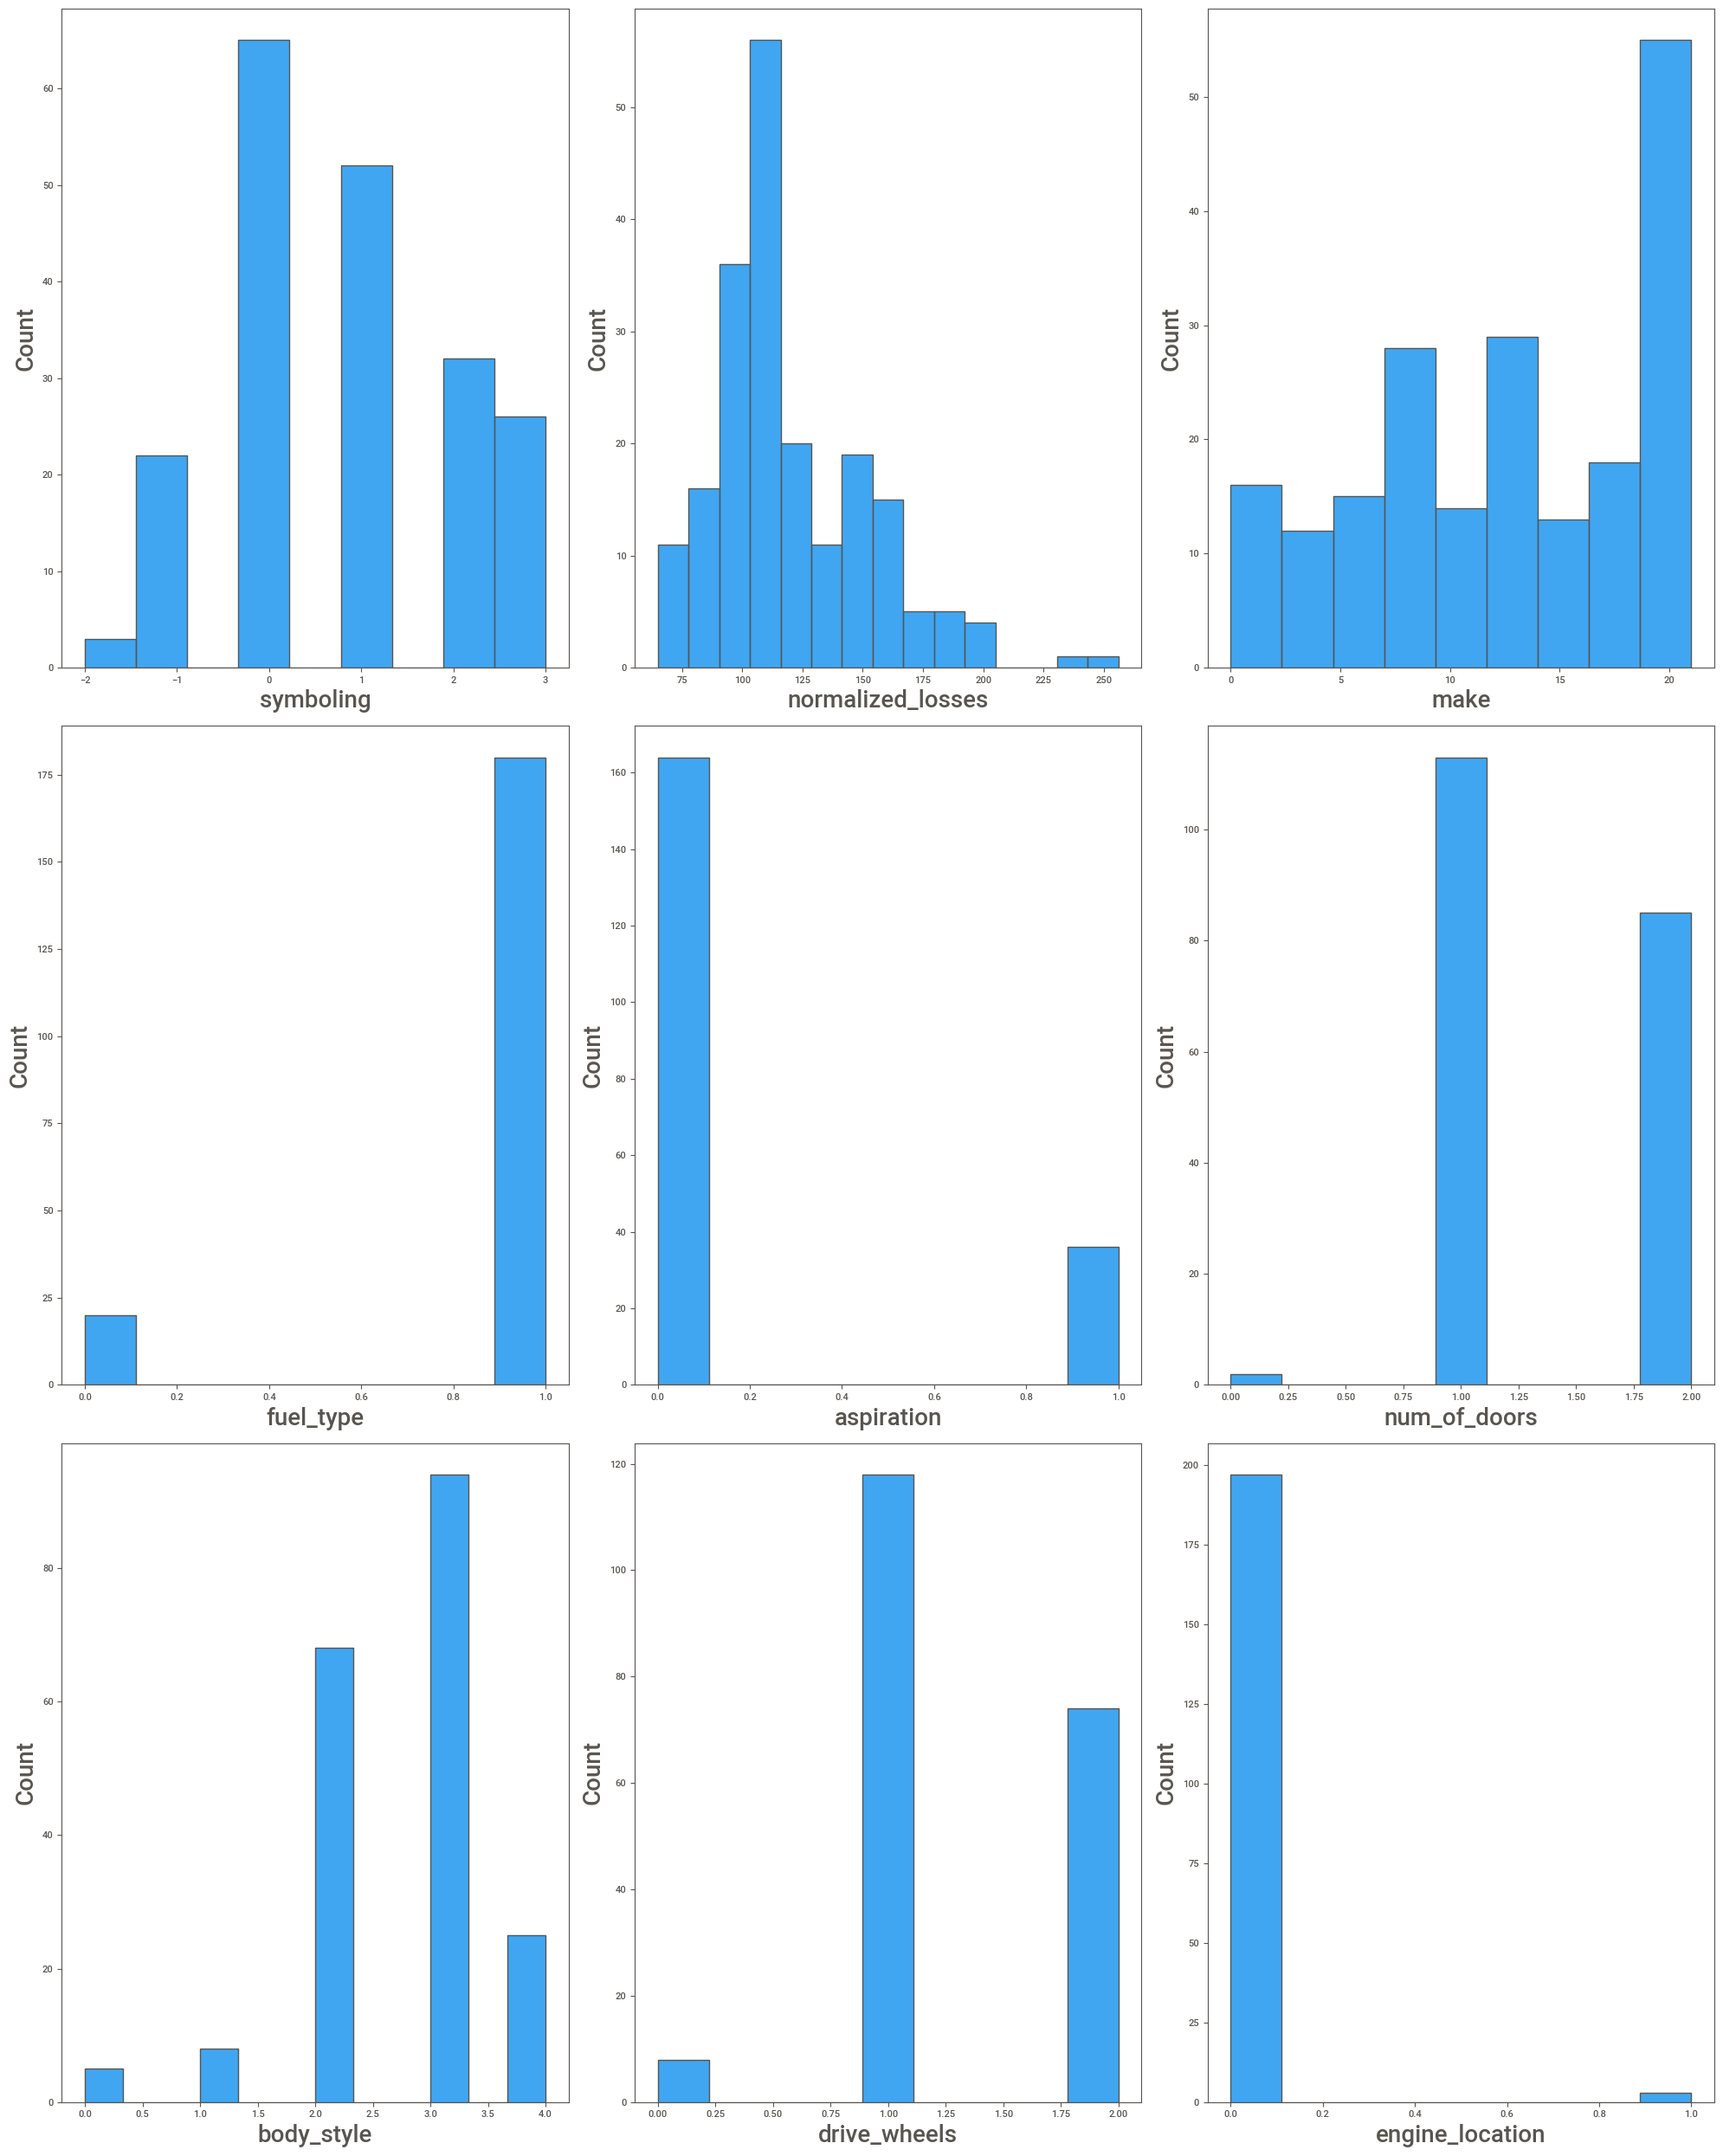

In [21]:
# Visualize histograms
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [22]:
# Insights:
# Features

C:\Users\prame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


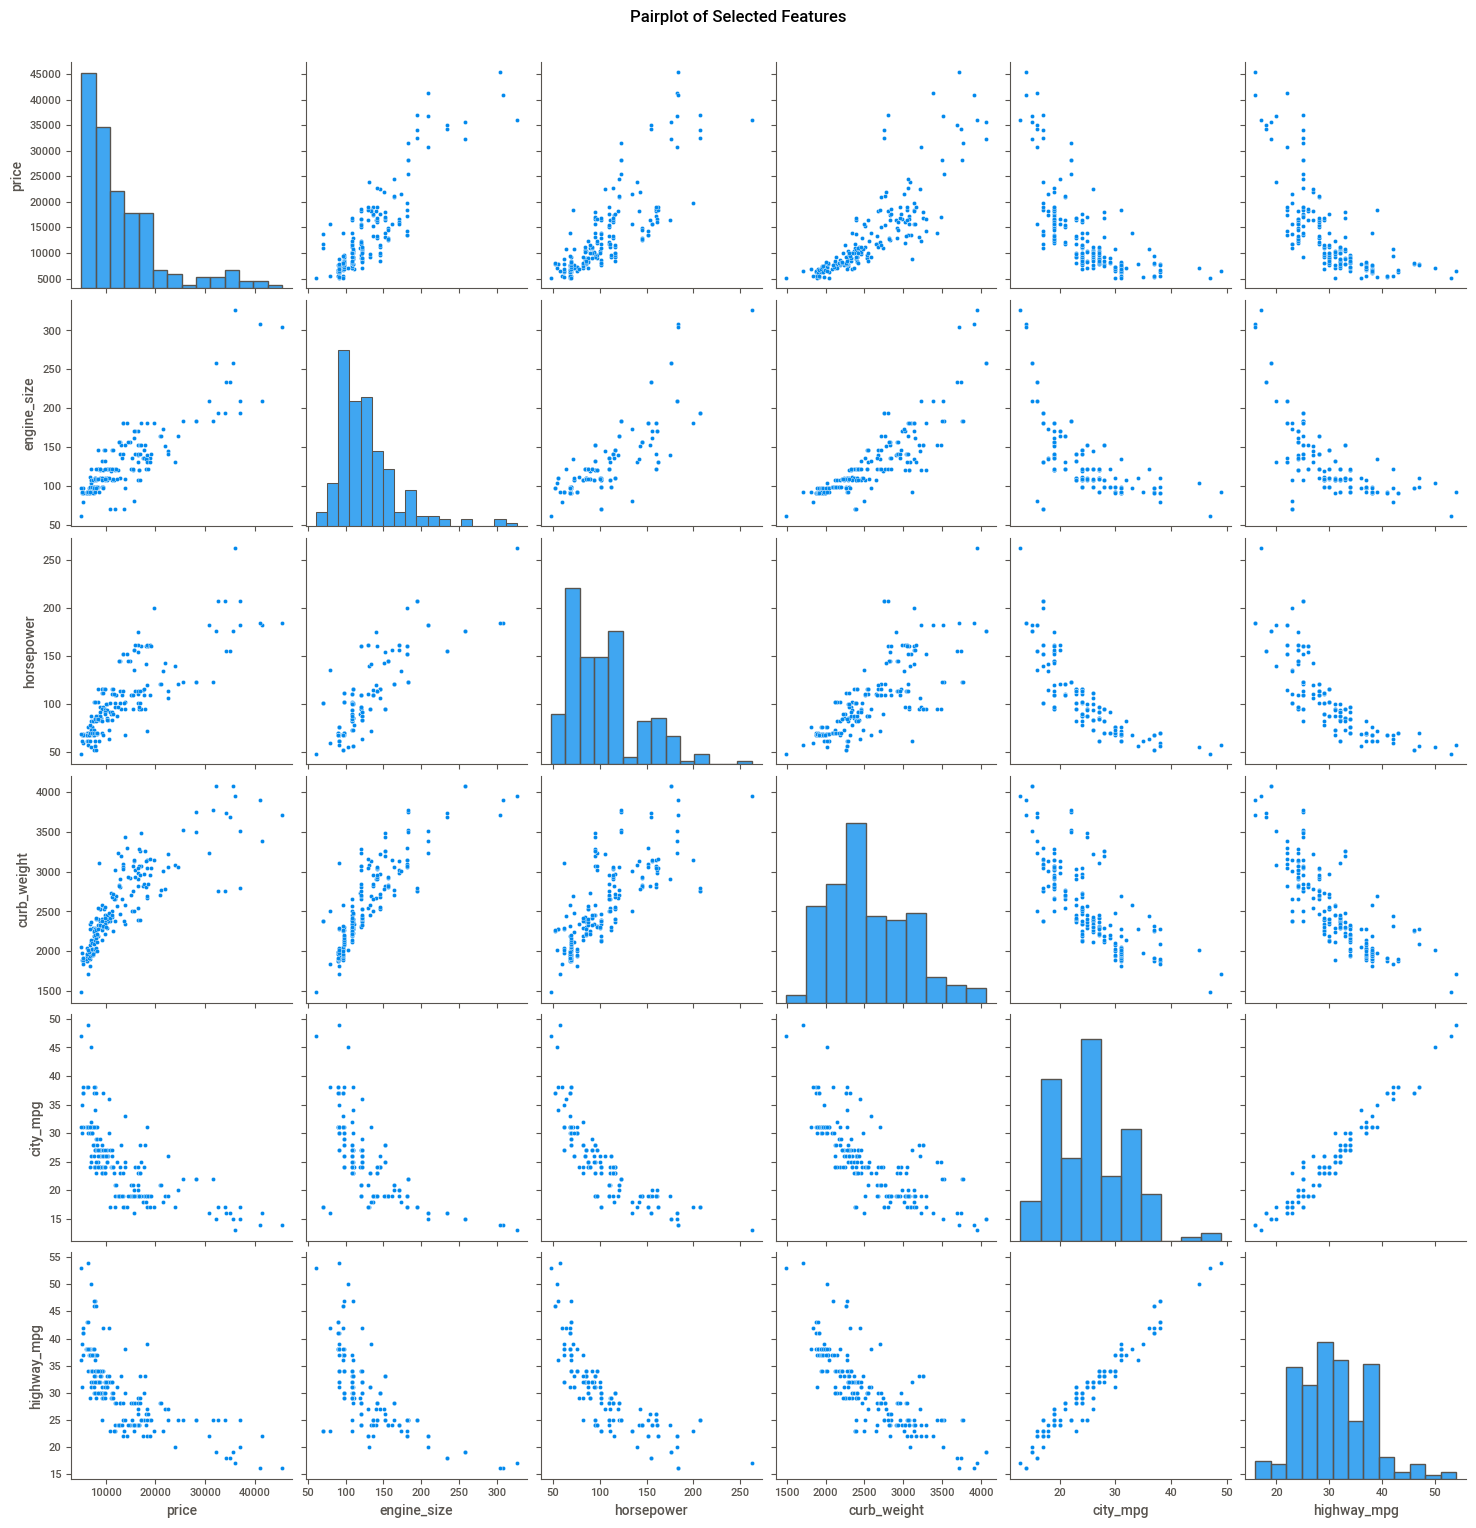

In [23]:
# Pairplot
sns.pairplot(data[['price', 'engine_size', 'horsepower', 'curb_weight', 'city_mpg', 'highway_mpg']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [24]:
# Insights:
# Positive Correlations:
#   - Price increases with engine size, horsepower, and curb weight.
#   - Engine size, horsepower, and curb weight are positively correlated with each other.
   
# Negative Correlations:
#   - City and highway mpg (miles per gallon) decrease as price, engine size, horsepower, and curb weight increase.
   
# Distributions:
#   - Price and engine size have a right-skewed distribution.
#   - City and highway mpg show more normal distribution patterns.


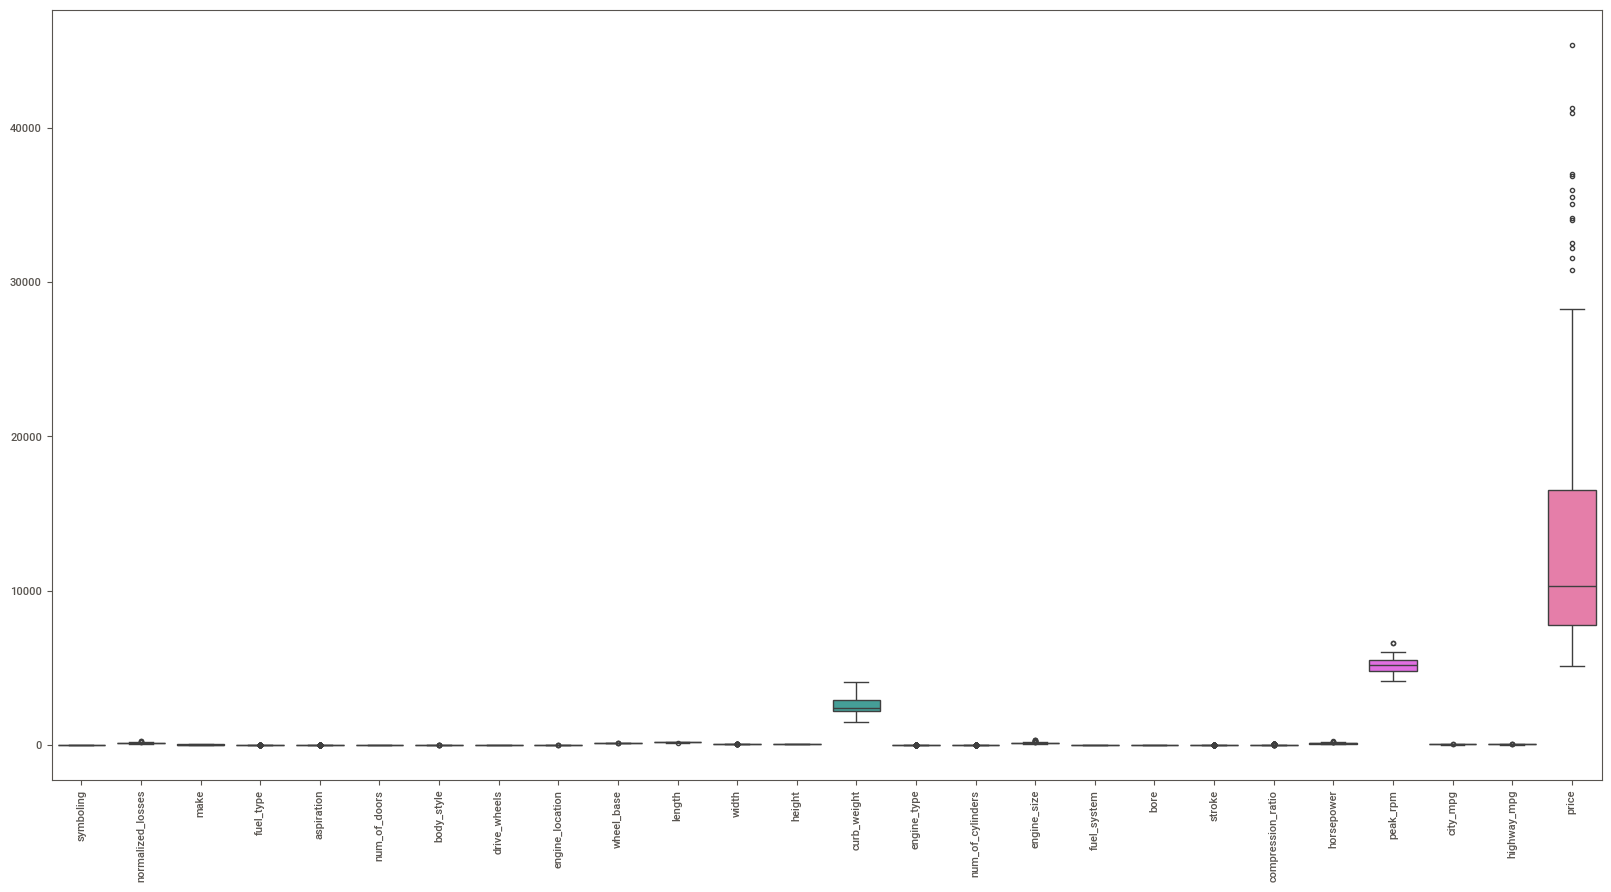

In [25]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Insights:-
# Median Values: The line inside each box represents the median of that feature, providing a central reference point.
# Interquartile Range (IQR): The box represents the middle 50% of data (between the 25th and 75th percentiles). A larger box
# indicates more variability within that feature, while a smaller box suggests more consistency in values.
# Range of Values: The length of the whiskers extending from each box shows the overall range of values, excluding outliers. 
# Consistency: Features with short boxes and whiskers are more consistent, showing less variability across the dataset. 
# Identifying Outliers: Dots or asterisks beyond the whiskers indicate outliers—data points that are significantly higher or lower than the rest.

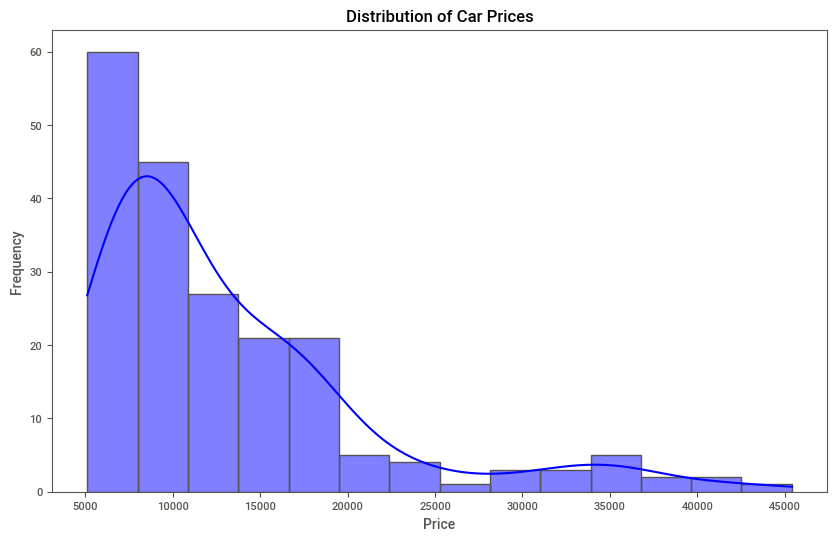

In [27]:
# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [28]:
# Insights:
# Distribution Shape: Most car prices cluster around a central value, with a possible right skew,
# indicating more lower-priced cars and fewer expensive ones.
# Central Tendency: The peak shows the most common price range, indicating typical car prices.
# Price Range: The spread indicates variability, showing a range from budget to premium cars.
# Outliers: Extreme bars suggest outliers, such as luxury or very cheap cars.
# Market Segmentation: Multiple peaks may indicate different car market segments, like economy and luxury.


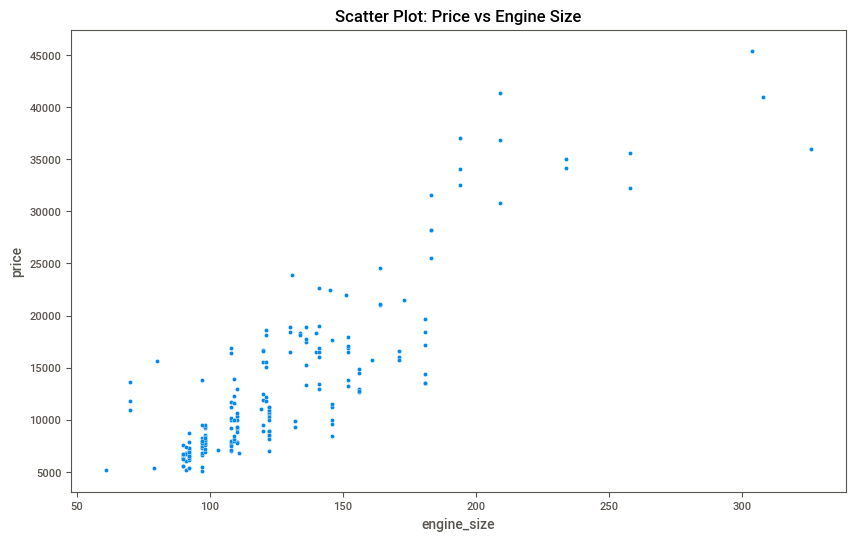

In [29]:
# Scatter Plot (Price vs Engine Size)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='price', data=data)
plt.title('Scatter Plot: Price vs Engine Size')
plt.show()

In [30]:
# Insights:

# 1.Positive Correlation: Generally, there is a positive correlation between engine size and price. As engine size increases, 
# the price tends to increase as well.

# 2.Variability in Prices: While the trend is upward, the price for similar engine sizes can vary significantly, 
# indicating that other factors (brand, features, etc.) also play a crucial role in determining the price.

# 3.Luxury Segment: Vehicles with engine sizes above approximately 200 cubic inches tend to be in the higher price range
# (above \$20,000), indicating they belong to a more premium or luxury segment.

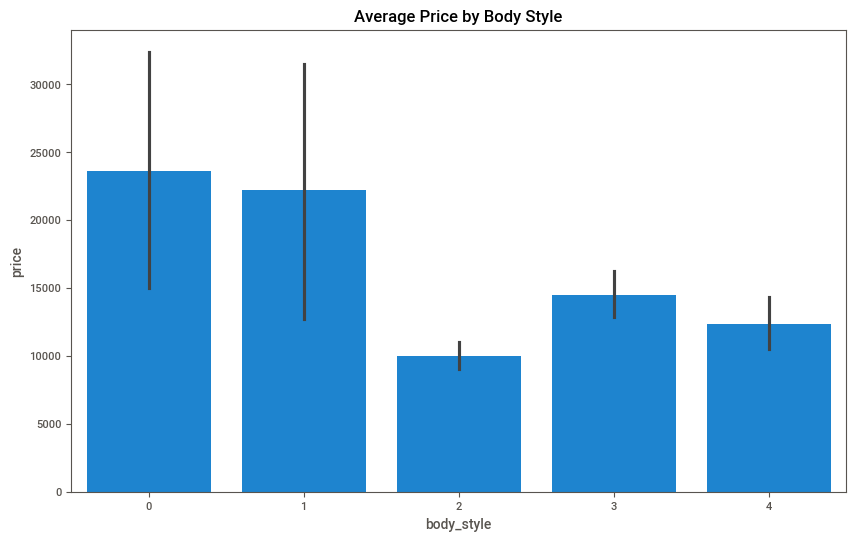

In [31]:
# Bar Plot (Average Price by Body Style)
plt.figure(figsize=(10, 6))
sns.barplot(x='body_style', y='price', data=data)
plt.title('Average Price by Body Style')
plt.show()

In [32]:
# Insights:
# Highest Avg Price: Convertibles
# Mid-range Prices: Sedans and Hatchbacks
# Lowest Avg Price: Wagons
# High Variability: Convertibles have a wide price range.

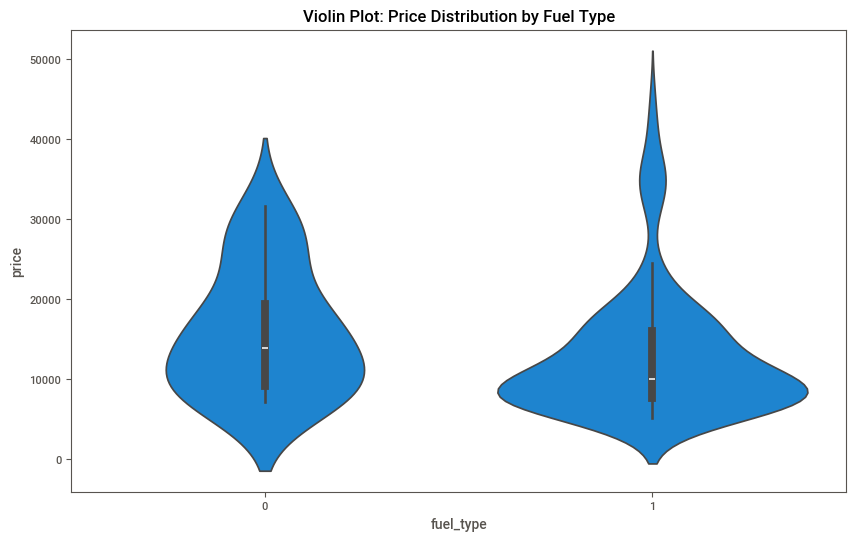

In [33]:
# Violin Plot (Price Distribution by Fuel Type)
plt.figure(figsize=(10, 6))
sns.violinplot(x='fuel_type', y='price', data=data)
plt.title('Violin Plot: Price Distribution by Fuel Type')
plt.show()

In [34]:
# Insights: 
# Gas cars: have a wider price range and higher median prices.
# Diesel cars: show more concentrated pricing with generally lower prices.

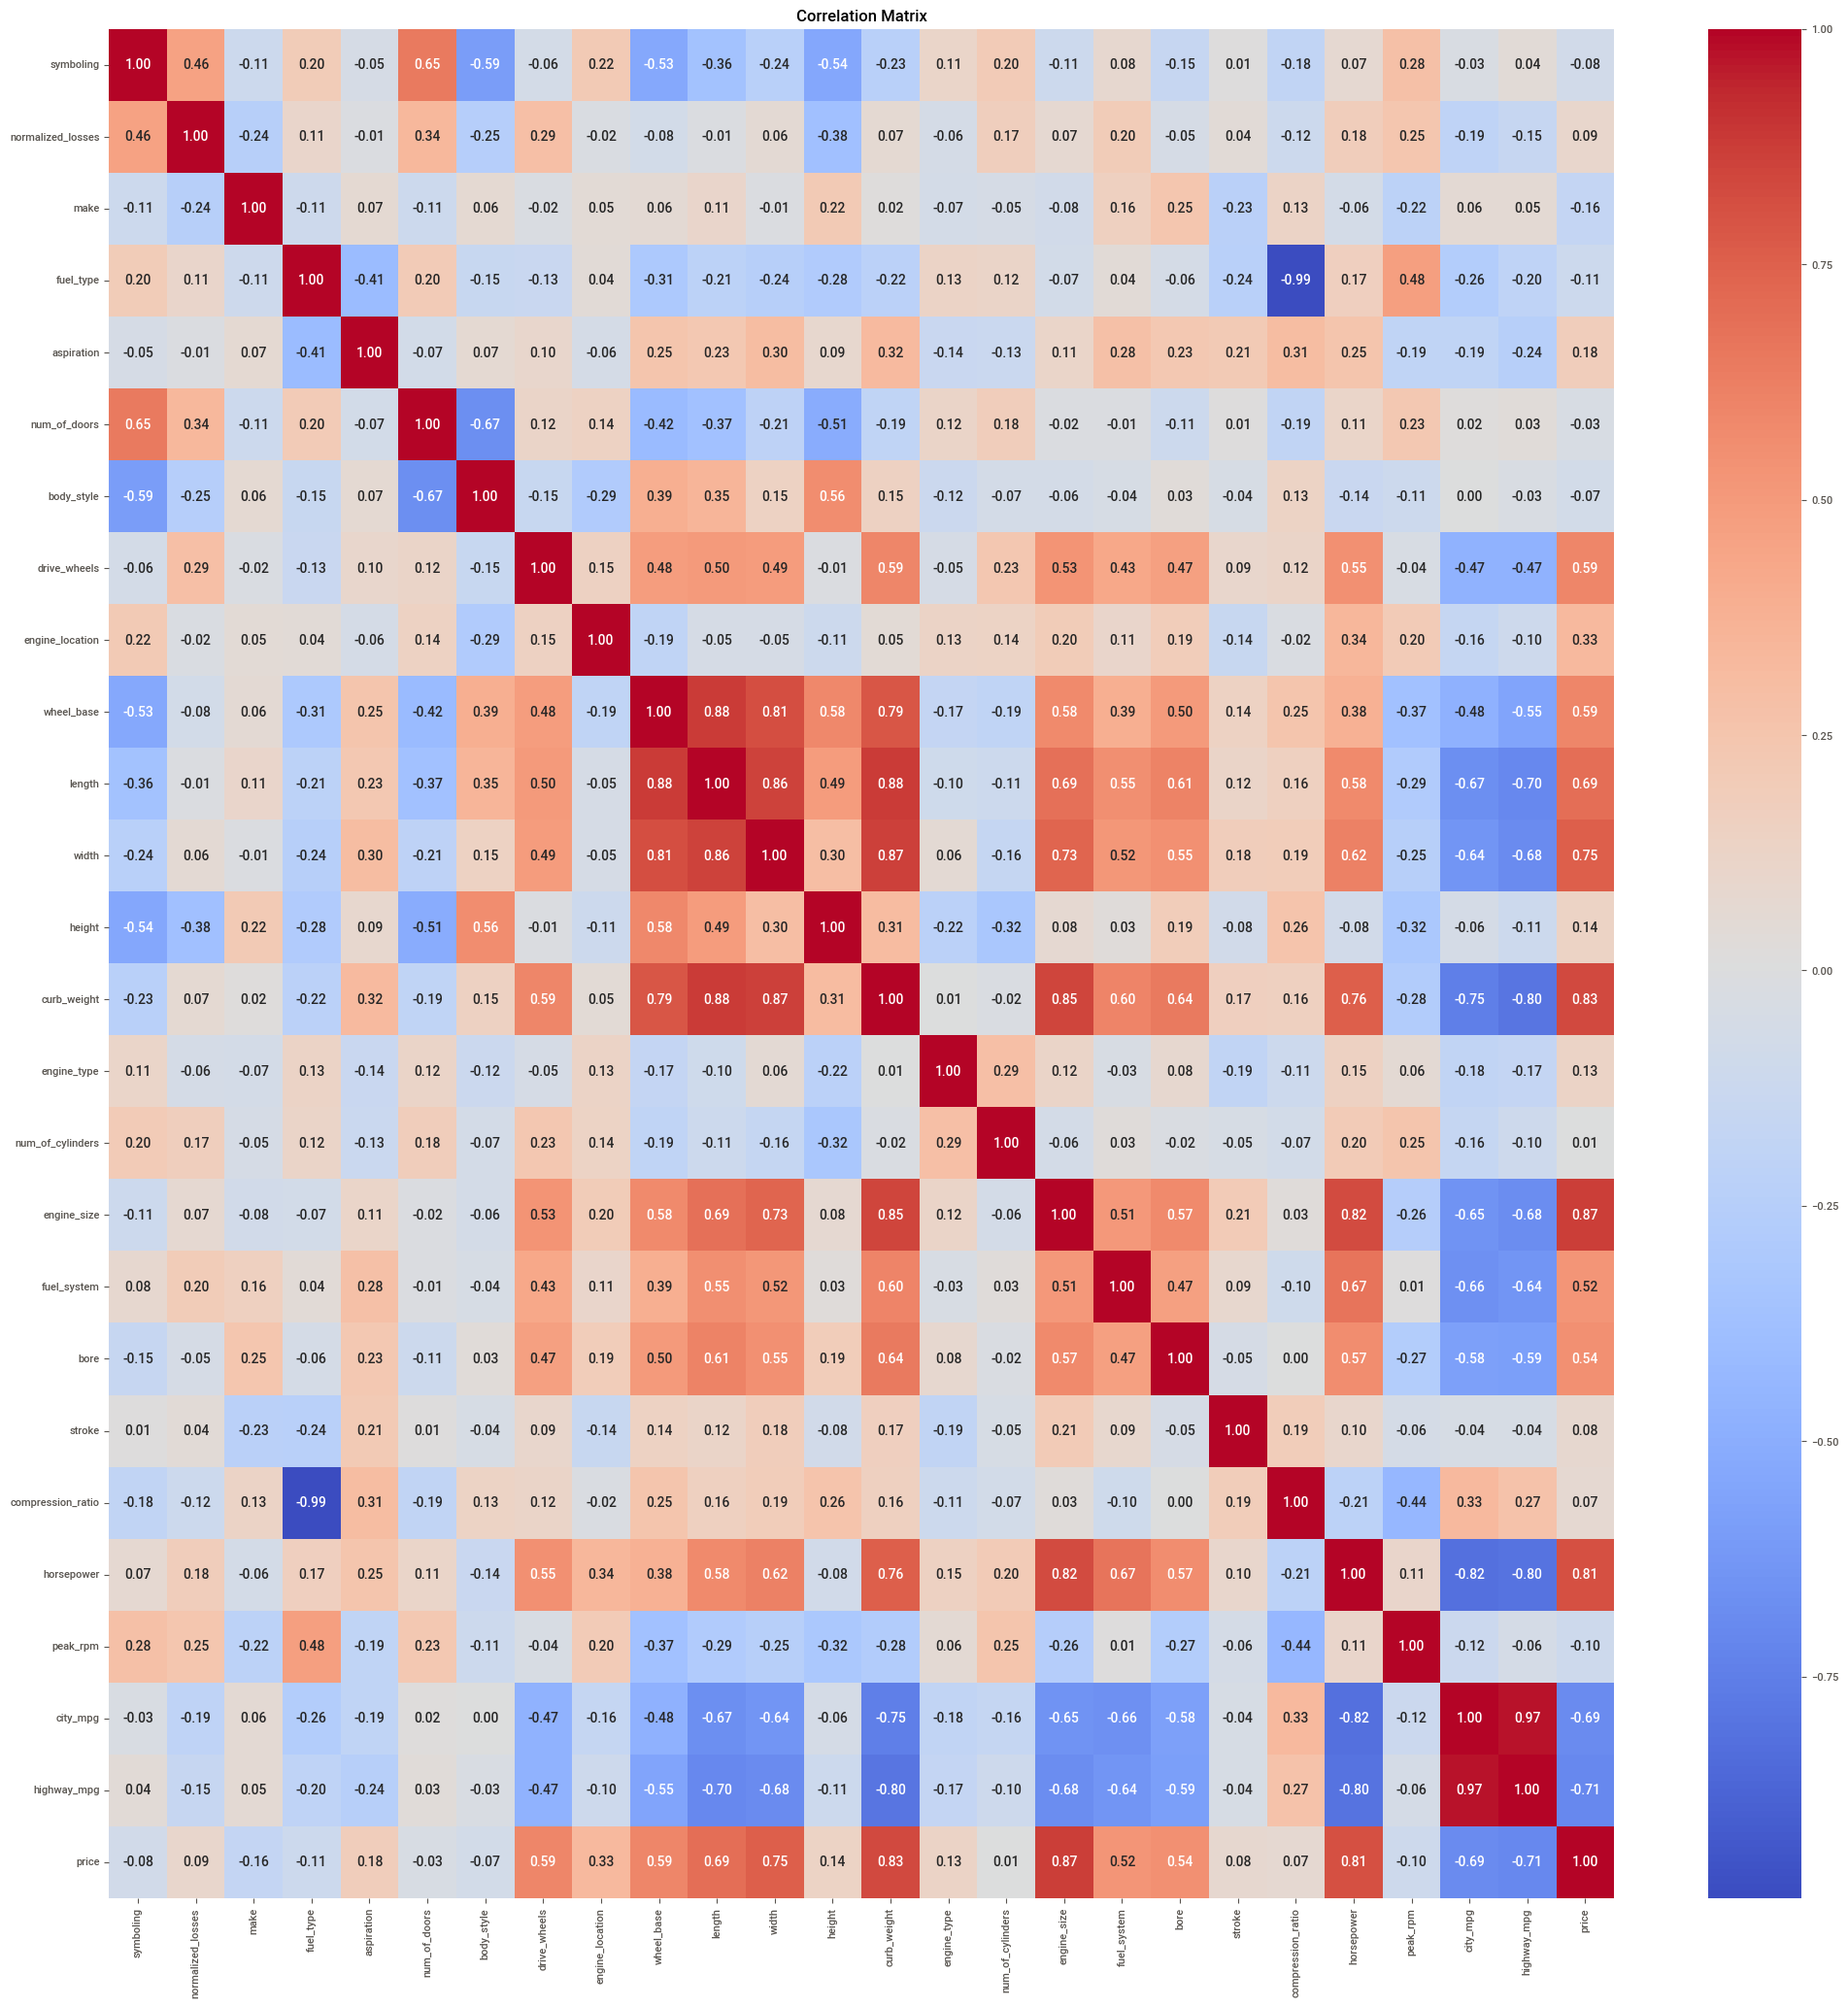

In [35]:
# Correlation matrix to see how numerical variables relate to price
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Insights:
# Correlation Strength: The heatmap shows the strength and direction of the correlation between features.
# Highly Correlated Features: Identify pairs of features that have high positive or negative correlations, which can indicate potential multicollinearity.
# Feature Selection: Use this to determine which features might be redundant and which ones are important for predictive modeling.

In [37]:
# Separate features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.svm import SVR

In [41]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
svm_model = SVR()

In [42]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)

SVR()

In [43]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)

In [44]:
# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [45]:
# Display results
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R^2 Score:", r2_lr)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

print("Decision Tree Regressor - Mean Squared Error:", mse_dt)
print("Decision Tree Regressor - R^2 Score:", r2_dt)

print("Support Vector Machine (SVM) - Mean Squared Error:", mse_svm)
print("Support Vector Machine (SVM) - R^2 Score:", r2_svm)

Linear Regression - Mean Squared Error: 14042447.072698314
Linear Regression - R^2 Score: 0.8746749477560558
Random Forest Regressor - Mean Squared Error: 3515896.794275461
Random Forest Regressor - R^2 Score: 0.9686215695066729
Decision Tree Regressor - Mean Squared Error: 8496889.075
Decision Tree Regressor - R^2 Score: 0.9241675569989701
Support Vector Machine (SVM) - Mean Squared Error: 129246740.47615811
Support Vector Machine (SVM) - R^2 Score: -0.15349229508767737


In [46]:
#'data' is the preprocessed DataFrame used for model training
feature_names = X.columns.tolist()
print("Features used during model training:")
print(feature_names)

Features used during model training:
['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_gas', 'aspiration_turbo', 'num_of_doors_four', 'num_of_doors_two', 'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_rear', 'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor', 'num_of_cylinders_five', 'num_of_cylinders_four', 'num_of_cylinders_six', 'num_of_cylinders_three', 'num_of_cyli

In [47]:
# Create a dictionary with all features, initially setting them to 0 or appropriate default values
new_data_dict = {feature: [0] for feature in X.columns}

In [48]:
# Set categorical features
# Here we assume the following example categories:
new_data_dict['make_audi'] = [1]
new_data_dict['fuel_type_gas'] = [1]
new_data_dict['body_style_sedan'] = [1]

In [49]:
# Convert to DataFrame
new_data = pd.DataFrame(new_data_dict)

In [50]:
# Ensure all columns in new_data match those in feature_names
new_data = new_data[feature_names]

In [51]:
# Model Deployment
# Function to predict Auto import prices
def predict_Auto_price(model, input_data):
    return model.predict(input_data)

In [52]:
# just for example
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [53]:
# Example usage
# Assuming we use the Random Forest model
final_model = models['Random Forest']

In [54]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [55]:
forest= RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
# Create a dictionary with all features, initially setting them to 0 or appropriate default values
new_data_dict = {feature: [0] for feature in X.columns}

In [57]:

# Sample training data (this should ideally be the data used during model training)
engine_sizes = [[90], [120], [160], [200], [240]]  # Example values

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Initialize and fit the scaler
scaler = MinMaxScaler()
scaler.fit(engine_sizes)


MinMaxScaler()

In [60]:
# Normalize the engine size for a new car
engine_size_to_predict = 130
normalized_engine_size = scaler.transform([[engine_size_to_predict]])[0][0]

In [61]:
# Add the normalized engine size to the dictionary
new_data_dict['engine_size'] = [normalized_engine_size]

In [62]:
# Set categorical features
new_data_dict['make_toyota'] = [1]   # Example for 'Toyota'
new_data_dict['body_style_sedan'] = [1]  # Example for 'Sedan'

In [63]:
# Convert to DataFrame
new_data = pd.DataFrame(new_data_dict)

In [64]:
# Ensure all columns in new_data match those in feature_names
new_data = new_data[feature_names]

In [65]:
# Example: Training a random forest model
model = RandomForestRegressor()

In [66]:
# Assuming you have features `X_train` and target variable `y_train`
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
# Predicting car price
predicted_price = model.predict(new_data)
print(f"Predicted Car Price: {predicted_price[0]}")

Predicted Car Price: 6361.343333333332


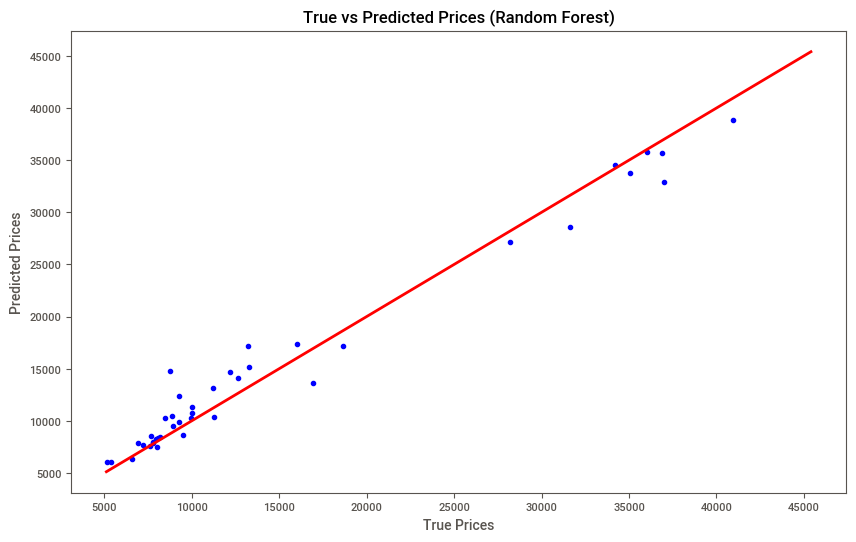

In [68]:
# Plot the true vs predicted prices
# Plot true vs predicted prices for the best model (Random Forest Regressor)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices (Random Forest)')
plt.show()

In [69]:
# Insights: 
# The model predicts lower prices well but struggles with higher prices, often underestimating them.

In [70]:
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [71]:
reg.score(X_test, y_test)

0.8746749477560564

In [72]:
forest= RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
forest.score(X_test, y_test)

0.9672365053707555

In [74]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
tree.score(X_test, y_test)

0.9409810279043034

In [76]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [77]:
svr.score(X_test, y_test)

-0.1545297377262369

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [79]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [80]:
gbr.score(X_test, y_test)

0.9735931865393148

In [81]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [82]:
knn.score(X_test, y_test)

0.8534819584742831

In [83]:
# Define additional models
knn_model =  KNeighborsRegressor(n_neighbors=5)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [84]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [85]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)  # Scaled data is used here
y_pred_knn = knn.predict(X_test_scaled)

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [88]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [89]:
# Best parameters and evaluation after tuning
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [90]:
# Best parameters and best score for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.8794351168515254


In [91]:
# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)

Random Forest - Mean Squared Error: 3515896.794275461
Random Forest - R^2 Score: 0.9686215695066729


In [92]:
# Feature Importance from the Best Model (Random Forest)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

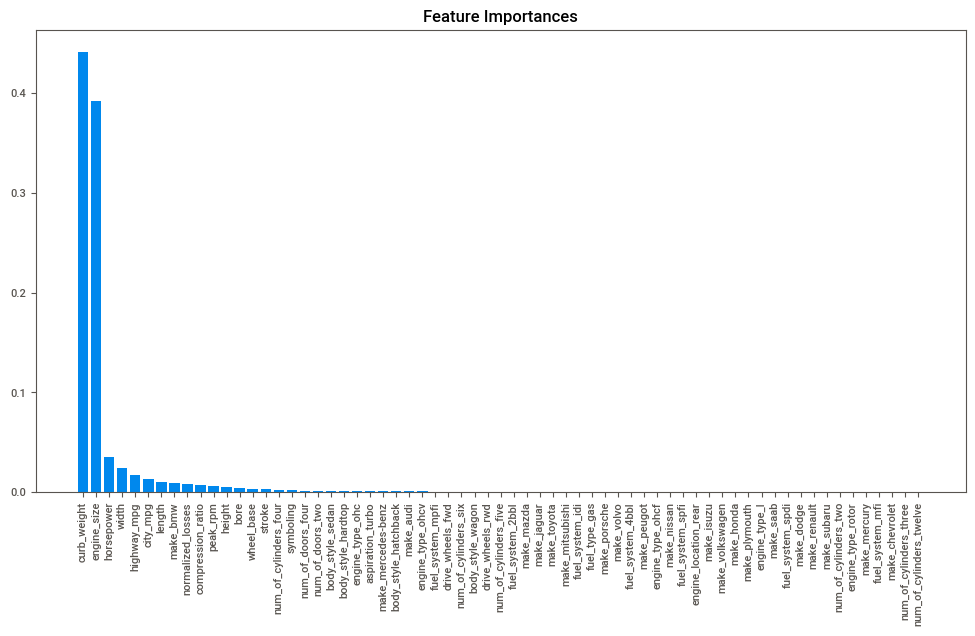

In [93]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


In [94]:
# Insights
print("Top 5 Features Influencing the Price:")
for i in range(5):
    print(f"{i+1}. {features[indices[i]]} - Importance: {importances[indices[i]]:.4f}")

Top 5 Features Influencing the Price:
1. curb_weight - Importance: 0.4411
2. engine_size - Importance: 0.3924
3. horsepower - Importance: 0.0352
4. width - Importance: 0.0238
5. highway_mpg - Importance: 0.0175


In [95]:
# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
models.update({
    'Linear Regression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'k-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
})


In [97]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Model Comparison Report
print("Model Comparison Report")
print(results_df)

Model Comparison Report
                      Model          MAE           MSE          RMSE        R2
0             Random Forest  1372.983851  3.548970e+06   1883.871085  0.968326
1         Linear Regression  2386.566210  1.404245e+07   3747.325323  0.874675
2             Decision Tree  1759.075000  8.496889e+06   2914.942379  0.924168
3  Support Vector Regressor  7036.870187  1.292467e+08  11368.673646 -0.153492
4       k-Nearest Neighbors  3347.505000  2.867460e+07   5354.866624  0.744087
5         Gradient Boosting  1255.746086  3.271924e+06   1808.845974  0.970799


In [98]:
# Business Case for Flight Price Prediction Model

# Objective: The primary goal is to develop a predictive model to forecast car prices based on various independent variables.
# (e.g., engine size, horsepower, weight, etc.).

# Importance: This model will enable management to understand the factors that influence car prices, allowing them to make
# informed decisions on design, strategy, and pricing to optimize profitability and market share.

# Problem Statement:
# Current Challenge: The automotive industry is highly competitive, with price being a key factor that influences consumer decisions.
# However, determining the optimal price for a car model that balances profitability with market competitiveness is complex due to the
# interplay of various factors.

# Need: A predictive model that accurately forecasts car prices based on design and performance variables will help the company 
# strategically price its products and plan future models.

# Proposed Solution:
# Predictive Model: Develop a machine learning model that predicts the price of a car based on its characteristics. 
# The model will analyze historical data to identify the relationship between the independent variables and the car price.
# Data Analysis: The analysis will identify key variables that significantly impact car prices, such as engine size, 
# horsepower, and weight. This insight will guide the design and marketing strategy.

# Benefits:
# Optimized Pricing Strategy: The model will allow the company to set competitive prices that maximize profitability 
# while remaining attractive to customers.
# Design Insights: Understanding how design elements like engine size and weight impact price will enable the company
# to make informed decisions during the product development phase.
# Market Positioning: By predicting the price range that appeals to specific market segments, the company can better
# target its products and marketing efforts.

# Implementation Plan:
# Phase 1: Data Collection and Preprocessing - Gather and clean the necessary data.
# Phase 2: Model Development - Use statistical techniques and machine learning algorithms to build the predictive model.
# Phase 3: Model Validation and Testing - Validate the model’s accuracy using historical data and refine as necessary.
# Phase 4: Deployment and Integration - Integrate the model into the company’s pricing and design strategy workflow.
# Phase 5: Monitoring and Adjustment - Continuously monitor the model’s performance and adjust based on market changes.

# Risks and Mitigation:
# Risk: Data inaccuracies or incomplete data could lead to incorrect predictions.
# Mitigation: Ensure thorough data validation and consider including additional data sources.
# Risk: The model might not capture sudden market shifts or new trends.
# Mitigation: Regularly update the model with new data and recalibrate as needed.

# Conclusion:
# This predictive model is not just a tool for setting prices; it’s a strategic asset that will empower the company to stay
# competitive, make data-driven decisions, and enhance profitability in a dynamic market environment.

In [99]:
# Report on Challenges Faced

# Data Quality and Availability:
# Incomplete Data: Missing values or incomplete data entries can hinder the model's ability to make accurate predictions.
# Data Inconsistency: Inconsistencies in data formats or units of measurement can complicate data preprocessing and model training.

# Feature Selection and Engineering:
# High Dimensionality: A large number of variables can lead to overfitting, where the model becomes too complex and fails to 
# generalize well to new data.
# Multicollinearity: Some independent variables may be highly correlated, which can distort the model's interpretation and 
# reduce accuracy.
# Feature Importance: Identifying which variables have the most significant impact on car prices requires careful analysis
# and testing, which can be time-consuming.

# Model Selection and Training:
# Choosing the Right Model: Selecting an appropriate model (e.g., linear regression, decision trees, or more complex machine
# learning algorithms) that balances accuracy with interpretability can be challenging.
# Overfitting vs. Underfitting: Striking the right balance between a model that is too simple (underfitting) and one that is 
# too complex (overfitting) requires careful tuning and validation.
# Hyperparameter Tuning: Optimizing model parameters to improve performance can be computationally intensive and requires
# expertise.

# Data Preprocessing:
# Normalization and Scaling: Different variables may have different scales, necessitating normalization or scaling to ensure
# the model treats them appropriately.
# Handling Outliers: Outliers in the data can skew the results, requiring careful identification and potentially removal
# or transformation.
# Categorical Variables: Encoding categorical variables (e.g., car brand, fuel type) in a way that the model can interpret
# can be challenging, especially when there are many categories.

# Model Evaluation and Validation:
# Cross-Validation: Ensuring the model performs well across different subsets of data requires thorough cross-validation, 
# which can be resource-intensive.
# Model Interpretability: Complex models like neural networks or ensemble methods can be difficult to interpret, 
# making it challenging to explain predictions to stakeholders.